In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1-Load dataset

In [254]:

df=pd.read_csv(r'C:\Users\Smile\Downloads\titanic_dataset.csv')

In [256]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2-Make ‘PassengerId’ as index column

In [259]:
df.set_index('PassengerId', inplace=True)

In [261]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Basic details of df

In [264]:
df.shape

(891, 11)

In [266]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [335]:
#Feature Selection
X=df[['Pclass','Sex','Age','SibSp','Parch']]
#Target columns
Y=df['Survived']

In [272]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# 4 Fill in all missing values

In [275]:

df=pd.read_csv(r'C:\Users\Smile\Downloads\titanic_dataset.csv')

In [277]:
missing_valuess=df[['Age']]

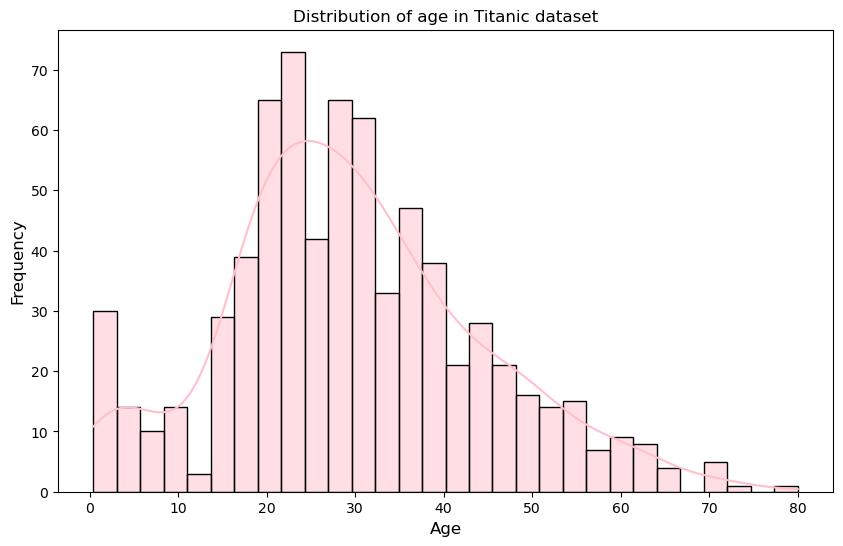

In [279]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'],kde=True,bins=30,color='pink')
plt.title('Distribution of age in Titanic dataset')
plt.xlabel('Age',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()


In [281]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [285]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 5 Handling outliers

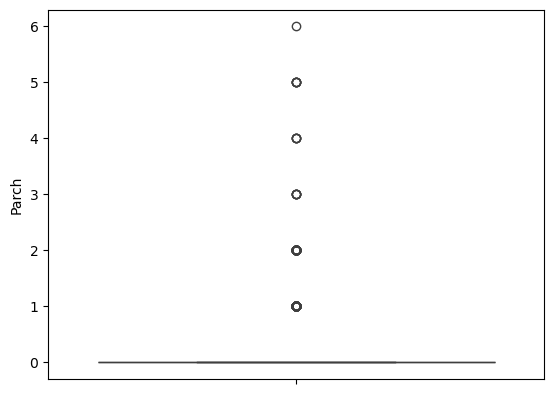

In [301]:
sns.boxplot(df['Parch'])
plt.show()

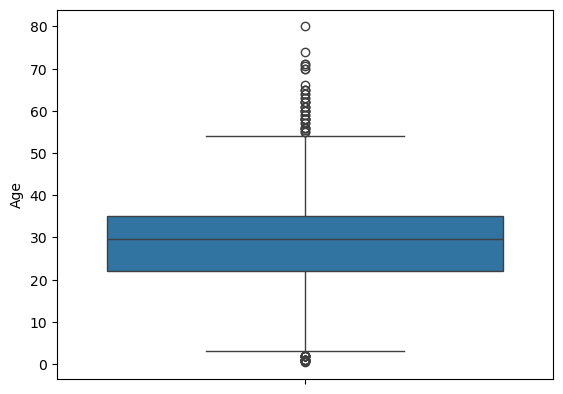

In [323]:
sns.boxplot(df['Age'])
plt.show()

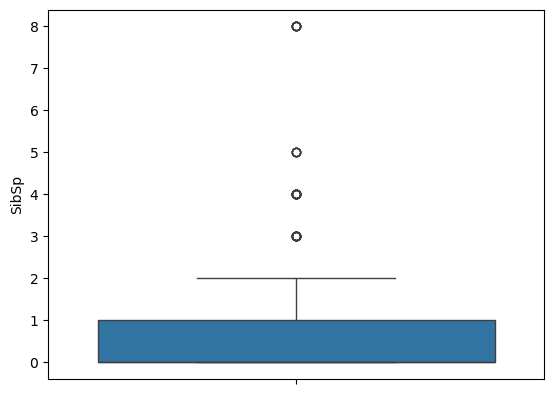

In [327]:
sns.boxplot(df['SibSp'])
plt.show()

In [329]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [359]:
X['Sex_encoded']=le.fit_transform(X['Sex'])

In [341]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Sex_encoded
0,3,male,22.0,1,0,1
1,1,female,38.0,1,0,0
2,3,female,26.0,0,0,0
3,1,female,35.0,1,0,0
4,3,male,35.0,0,0,1


In [343]:
X=X.drop('Sex',axis=1)

In [345]:
X.head()

,Pclass,Age,SibSp,Parch,Sex_encoded
0,3,22.0,1,0,1
1,1,38.0,1,0,0
2,3,26.0,0,0,0
3,1,35.0,1,0,0
4,3,35.0,0,0,1


In [347]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_scaled=sc.fit_transform(X)


In [353]:
X_scaled=pd.DataFrame(X_scaled,columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch'])

In [355]:
X_scaled

,Pclass,Sex,Age,SibSp,Parch
0,1.0,0.271174,0.125,0.000000,1.0
1,0.0,0.472229,0.125,0.000000,0.0
2,1.0,0.321438,0.000,0.000000,0.0
3,0.0,0.434531,0.125,0.000000,0.0
4,1.0,0.434531,0.000,0.000000,1.0
...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,1.0
887,0.0,0.233476,0.000,0.000000,0.0
888,1.0,0.367921,0.125,0.333333,0.0
889,0.0,0.321438,0.000,0.000000,1.0
